# PyTorch Workflow

Let's explore a an example of PyTorchn en-to-end workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for graphs
import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cu118'

## 1. Data (Preparing and Loading)

Data can be almost anything...in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts 
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, lets' create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known *parameters*.

In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]
# len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and testing

Let's create a trainig and testing set with our data

In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### How might we better visualize our data?
This is where the data explorer's motto comes in!

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    
    plt.figure(figsize = (10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

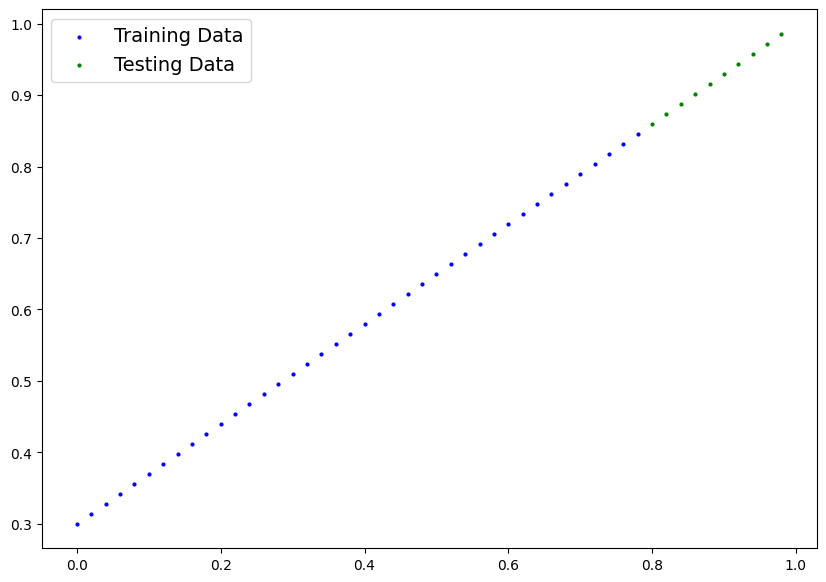

In [7]:
plot_predictions();

## 2. Build Model

Our first PyTorch Model!!


* Start with random values (bias and weights)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
Through two main algorithms:
* Back-Propogation
* Gradient Descent

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <-almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad = True,
                                            ))

    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data 
        return self.weights * x + self.bias

    

### PyTorch model building essentials

* torch.nn        --> contains all of the buildings for computational graphs (Neural Network)

* torch.Parameter --> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module  --> base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim      --> this is where the optimizers in PyTorch live, they will help with gradient descent

* def forward()    --> All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

We can check our model parameter or what's inside our model using .parameters()

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

model_0

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the forward()method.

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can do something similar with torch.no_grad()

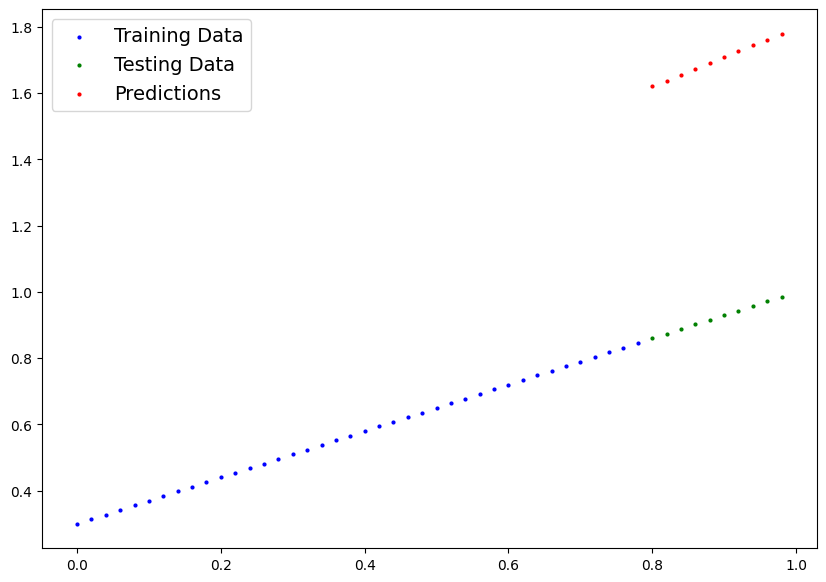

In [13]:
plot_predictions(predictions = y_preds)

In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


# 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters to some known parameters.

One way to measure how poor or how wrong your models prediction are is to use a *loss function*

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function. 

Things we need to train:
* **Loss Function**: A function to measure how wrong your model's prediction are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function. 

And specifically for PyTorch, we need:
* A training loop 
* A testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [16]:
# Check out our model's parameters (a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data

1. Forward Pass (this involves data moving through our model's forward() function) to make predictions on data - also called forward propogation

2. Calculate the loss (compare foward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss Backward [Back Propogation] - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss

5. Optimizer Step [Gradient Descent]- use the optimizer to adjust our model's parameters to try and improve the loss

In [18]:
torch.manual_seed(42)

# An epoch is one loop through the data...(hyperparameter: we've set them)
epochs = 1000

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training

# 0. Loop through the data 
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # Train mode in PyTorch sets all parameters that require gradients to require_grad
    
    # 1. Forward Pass
    y_pred = model_0(X_train);

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Back-Propogation on the loss w.r.t the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the opitimizer changes will accumulate through the loop so...we have to zero them above in step 3 for the next iteration of the loop
    
    ### Testing 

    # Put the model in evaluation mode
    model_0.eval() # turns off different settings in the model not needed for evaluation (dropout/ normalization)

    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if(epoch%10 == 0):
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

        # Print out what's happening
        print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Training Loss: 0.6860889196395874 | Test Loss: 0.775876522064209
Epoch: 10 | Training Loss: 0.6745680570602417 | Test Loss: 0.7624056935310364
Epoch: 20 | Training Loss: 0.6630472540855408 | Test Loss: 0.7489349246025085
Epoch: 30 | Training Loss: 0.6515263915061951 | Test Loss: 0.7354640960693359
Epoch: 40 | Training Loss: 0.6400055885314941 | Test Loss: 0.7219933271408081
Epoch: 50 | Training Loss: 0.6284847259521484 | Test Loss: 0.7085224986076355
Epoch: 60 | Training Loss: 0.6169638633728027 | Test Loss: 0.6950516104698181
Epoch: 70 | Training Loss: 0.6054430603981018 | Test Loss: 0.6815808415412903
Epoch: 80 | Training Loss: 0.5939221978187561 | Test Loss: 0.6681100130081177
Epoch: 90 | Training Loss: 0.5824013352394104 | Test Loss: 0.6546391844749451
Epoch: 100 | Training Loss: 0.5708805322647095 | Test Loss: 0.641168475151062
Epoch: 110 | Training Loss: 0.5593596696853638 | Test Loss: 0.6276975870132446
Epoch: 120 | Training Loss: 0.5478388667106628 | Test Loss: 0.614

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])

In [20]:
weight,bias

(0.7, 0.3)

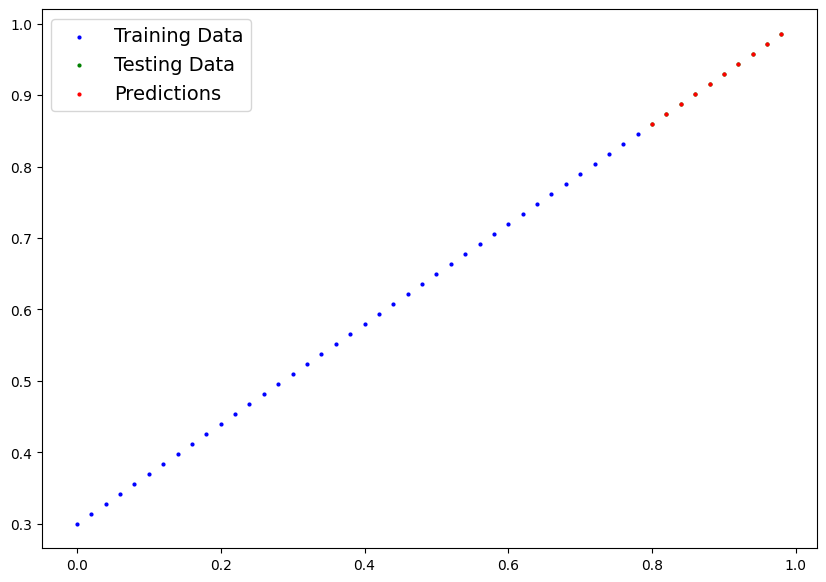

In [21]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

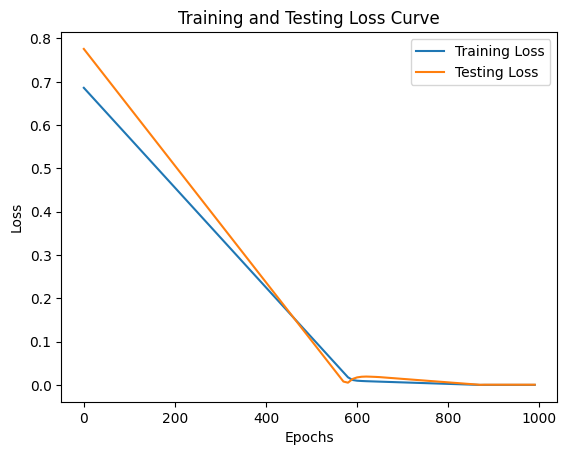

In [22]:
# Plot the loss curves 
plt.plot(epoch_count, train_loss_values, label = "Training Loss")
plt.plot(epoch_count, test_loss_values, label = "Testing Loss")
plt.title("Training and Testing Loss Curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch:

1. 'torch.save()' --> Allows you to save a PyTorch object in Python's pickle format 
2. 'torch.load()' --> Allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' --> Allows you to load a model's saved state dictionary

In [23]:
# Saving a PyTorch model

from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models\01_PyTorch Workflow.pth


# Loading a PyTorch Model

Since we saved our model's 'state_dict()' rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])

In [25]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2999]))])

In [27]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_y_preds = loaded_model_0(X_test)

loaded_model_y_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [28]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8595],
        [0.8735],
        [0.8875],
        [0.9015],
        [0.9154],
        [0.9294],
        [0.9434],
        [0.9574],
        [0.9714],
        [0.9854]])

In [29]:
# Compare loaded model preds with originla model preds
y_preds == loaded_model_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cu118'

In [31]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [32]:
!nvidia-smi

Tue Jan 16 14:55:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               4W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

First, we'll hard-code some weight and bias values.

Then, we'll make a range of number between 0 and 1, these will be our X values.

Finally, we'll use the X values, as well as the weight and bias values to create y using the linear regression formula ( y = weight * X + bias)

In [33]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (Features and Labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data 

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

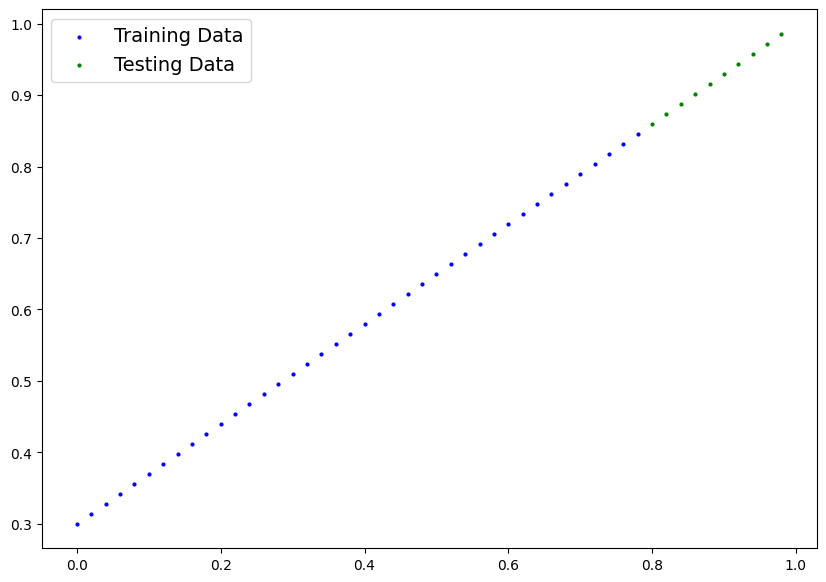

In [35]:
plot_predictions()

### 6.2 Building a PyTorch linear model

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using nn.Parameter(), we'll use nn.Linear(in_features, out_features) to do it for us.

Where in_features is the number of dimensions your input data has and out_features is the number of dimensions you'd like it to be output to.

In our case, both of these are 1 since our data has 1 input feature (X) per label (y).

In [41]:
# Subclass nn.Module to make our model

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, etc. 
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [43]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [44]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [47]:
# Setup loss function
loss_fn  = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [49]:
# Let's write a training loop 
torch.manual_seed(42)

epochs = 200


# Put data on the target device 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    # 1. Forward Pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Backpropogation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if((epoch%10) == 0):
        print(f"Epochs: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epochs: 0 | Loss: 0.5551779270172119 | Test Loss: 0.5739762187004089
Epochs: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epochs: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epochs: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epochs: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epochs: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epochs: 60 | Loss: 0.0199567973613739 | Test Loss: 0.045803118497133255
Epochs: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epochs: 80 | Loss: 0.01308917161077261 | Test Loss: 0.02994490973651409
Epochs: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epochs: 100 | Loss: 0.0062156799249351025 | Test Loss: 0.014086711220443249
Epochs: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epochs: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epochs: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [53]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

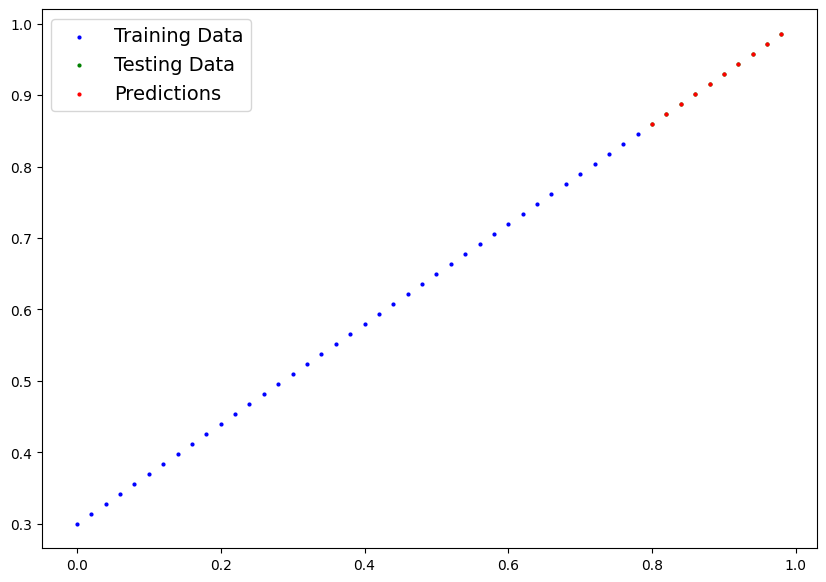

In [55]:
# Check out our model predictions visually 

plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model

In [59]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [60]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [61]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [63]:
# Evaluated loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')